In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

% matplotlib inline
sns.set_style(style = 'whitegrid')

### Importe o data set train_call_data e considere a variável alvo 'Event Clearance Description'(0,5 pontos)

In [2]:
data = pd.read_csv('input/train_call_data_v1.csv')

In [3]:
testset = pd.read_csv('input/test_call_data.csv')

**Alvo**: Event Clearance Description

In [4]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
y = data['Event Clearance Description']

### 1.1 Como está o balanceamento das Classes?

In [6]:
proportion = pd.DataFrame(data['Event Clearance Description'].value_counts()/data.shape[0] * 100)\
                                                             .reset_index()\
                                                             .rename(columns = {'index': 'Event', 'Event Clearance Description': 'Percentage'})

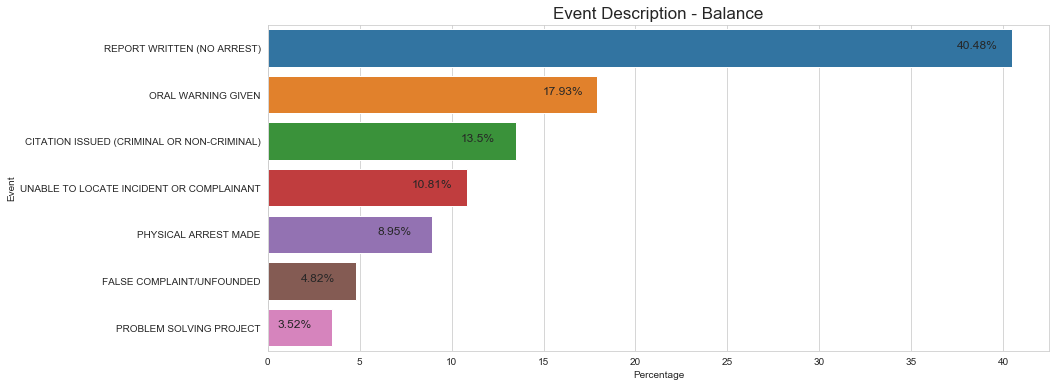

In [7]:
g = sns.barplot(y = 'Event', x = 'Percentage', data = proportion, ax = plt.subplots(figsize = (14, 6))[1])
g.set_title('Event Description - Balance', fontsize = 17)

for i, perct in enumerate(proportion['Percentage'].values):
    g.text(perct - 3, i, str(round(perct, 2)) + '%', fontsize = 12)

### 2. Realize o EDA que você julgar necessário (análise exploratória dos dados), o objetivo do EDA é mostrar alguns insights sobre os dados (1,0 pontos)

#### Check missing data

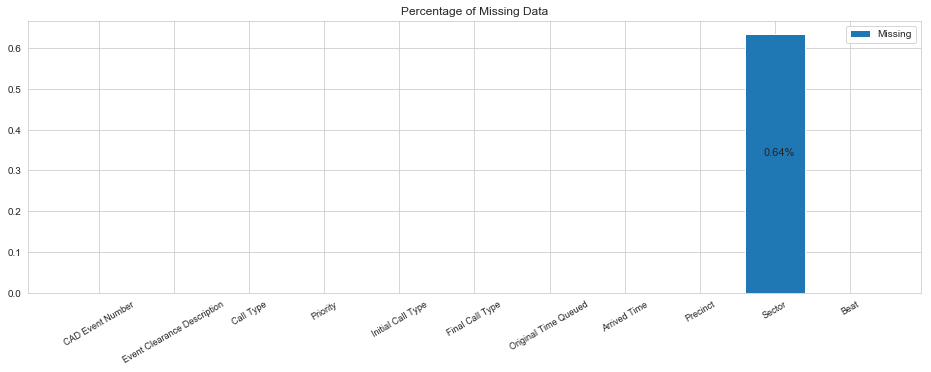

In [8]:
features = (data.isnull().sum()/data.shape[0] * 100).index.tolist()

plt.figure(figsize = (16, 5))
plt.bar(features, data.isnull().sum()/data.shape[0] * 100, label = 'Missing')
plt.xticks(features, fontsize=9, rotation=30)
plt.legend()
plt.title('Percentage of Missing Data')

for i, value in enumerate(data.isnull().sum()/data.shape[0] * 100):
    if value > 0:
        plt.text(i - 0.15, value - 0.3, f'{str(round(value, 2))}%', fontsize = '11')


#### EDA in Categorical Features

##### Call Type

In [9]:
aux = pd.DataFrame((data['Call Type'].value_counts()/data.shape[0] * 100) < 10).reset_index()

In [10]:
other = aux[aux['Call Type'] == True]['index'].values

In [12]:
index_ = data[data['Call Type'].isin(other)].index

In [13]:
data.loc[index_, 'Call Type'] = 'OTHER'

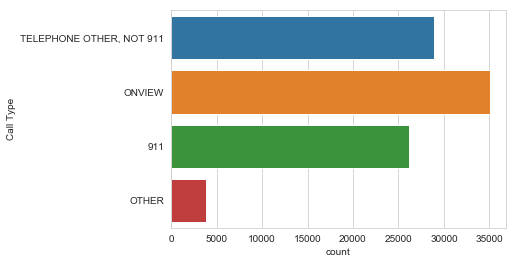

In [14]:
sns.countplot(y = data['Call Type'])

##### Priority

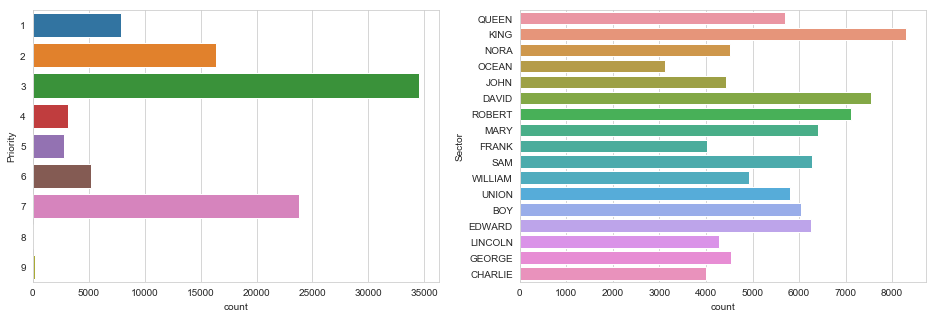

In [15]:
fig, ax = plt.subplots(ncols = 2, figsize = (16, 5))
sns.countplot(y = 'Priority', ax = ax[0], data = data)
sns.countplot(y = 'Sector', ax = ax[1], data = data)
#g.text()

In [16]:
import datetime

In [17]:
def month_number(month):
    return ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'].index(month) + 1

def process_date(arrived_date):
    time = None
    try:
        month, _, day, year, time = arrived_date.split(' ')
    except:
        month, day, year, time = arrived_date.split(' ')
    
    hour, minutes, sec = time.split(':')[:-1]
    
    return datetime.datetime(int(year), month_number(month), int(day), int(hour), int(minutes), int(sec))

`duration_time`: difference, in seconds, between `original time queued` and `arrived time`

In [18]:
data['Arrived Time'] = data['Arrived Time'].apply(lambda x: process_date(x))
data['Original Time Queued'] = pd.to_datetime(data['Original Time Queued'])
data['duration_time'] = (data['Arrived Time'] - data['Original Time Queued']).apply(lambda time: time.total_seconds()/60)

#### Creating a new feature to set the period of the day

#### Dropping some unusal features

In [ ]:
delete_columns = ['CAD Event Number', 'Original Time Queued', 'Arrived Time']
data.drop(columns = delete_columns, inplace = True)

#### Setting to zero the negative duration

In [ ]:
index_ = data[data['duration_time'] < 0].index
data.loc[index_, 'duration_time'] = 0

In [ ]:
data['duration_time'] = MinMaxScaler().fit_transform(data[['duration_time']])